In [ ]:
# Hossam Eldien Mohamed
# Mohamed Elsayed Radwan
# Ahmed Mohamed

In [3]:
# install dependencies needed for recording videos
!apt install -y xvfb x11-utils
!sudo apt-get update
!apt install python-opengl
!apt install ffmpeg
!pip install pyvirtualdisplay

!pip install --upgrade pip setuptools wheel
!pip install opencv-python

!pip install pyglet
!pip install ale-py==0.7.4 # To overcome an issue with gym (https://github.com/DLR-RM/stable-baselines3/issues/875)
!pip install pickle5

#!pip install gym pyvirtualdisplay > /dev/null 2>&1
#!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install colabgymrender==1.0.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.11).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 55 not upgraded.
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://archiv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pickle5-0.0.12-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (256 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for colabgymrender: filename=colabgymrender-1.0.2-py3-none-any.whl size=2426 sha256=ae1a615fc3c8f0ee6ec25c4a48467f9353546ac75d5dd23761b42c94eb437335
  Stored in directory: /root/.cache/pip/wheels/1f/56/73/3697080da5fc7b120516aef37d1d1eb2380515ba9e272b8ccd
Successfully built colabgymrender


In [4]:
!pip install gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip uninstall -y enum34

In [6]:
# Download ROMs
!wget http://www.atarimania.com/roms/Roms.rar
!unrar x -Y "/content/Roms.rar"

Streaming output truncated to the last 5000 lines.
Extracting  ROMS/Air-Sea Battle (32 in 1) (1988) (Atari, Larry Kaplan) (CX26163P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle (Hack) (Unknown) (4K).bin                  1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle (Anti-Aircraft) (1977) (Atari, Larry Kaplan) (CX2602, CX2602P) (PAL).bin       1%  OK 
Extracting  ROMS/Air-Sea Battle - Air Sea Battle - Target Fun (Anti-Aircraft) (1977) (Atari, Larry Kaplan - Sears) (CX2602 - 99802, 6-99802, 49-75102) ~.bin       1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) (Prototype).bin        1%  OK 
Extracting  ROMS/Airlock (1982) (Data Age) (DA1004) ~.bin                  1%  OK 
Extracting  ROMS/Airlock (1983) (Gameworld) (133-004) (PAL).bin            1%  OK 
Extracting  ROMS/Alices Abenteuer - Lilly Adventure (1983) (Quelle - Otto Versand) (732.273 8 - 600273, 781644) (PAL).bin       1%  

In [7]:
# Import ROMs into gym using Arcade Learning Environment (ALE)
!ale-import-roms /content/ROMS/

[SUPPORTED]           miniature_golf /content/ROMS/Miniature Golf - Arcade Golf (1979) (Atari, Tom Reuterdahl - Sears) (CX2626 - 6-99829, 49-75116) ~.bin
[SUPPORTED]                space_war /content/ROMS/Space War - Space Star (32 in 1) (1988) (Atari, Ian Shepard) (CX26163P) (PAL).bin
[SUPPORTED]                     hero /content/ROMS/H.E.R.O. (1984) (Activision, John Van Ryzin) (AZ-036-04) ~.bin
[SUPPORTED]              donkey_kong /content/ROMS/Donkey Kong (1982) (Coleco - Woodside Design Associates - Imaginative Systems Software, Garry Kitchen) (2451) ~.bin
[SUPPORTED]              word_zapper /content/ROMS/Word Zapper (Word Grabber) (1982) (U.S. Games Corporation - Vidtec - JWDA, Todd Marshall, Henry Will IV) (VC1003) ~.bin
[SUPPORTED]                   skiing /content/ROMS/Skiing - Le Ski (1980) (Activision, Bob Whitehead) (AG-005, CAG-005, AG-005-04) ~.bin
[SUPPORTED]             flag_capture /content/ROMS/Flag Capture - Capture (Capture the Flag) (1978) (Atari, Jim Huether - Se

In [ ]:
import base64
import random
from itertools import zip_longest

import imageio
import IPython
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np
import pandas as pd
import tensorflow as tf
from statsmodels.iolib.table import SimpleTable


SEED = 0              # seed for pseudo-random number generator
MINIBATCH_SIZE = 64   # mini-batch size
TAU = 1e-3            # soft update parameter
E_DECAY = 0.995       # ε decay rate for ε-greedy policy
E_MIN = 0.01          # minimum ε value for ε-greedy policy


random.seed(SEED)


def get_experiences(memory_buffer):
    experiences = random.sample(memory_buffer, k=MINIBATCH_SIZE)
    states = tf.convert_to_tensor(np.array([e.state for e in experiences if e is not None]),dtype=tf.float32)
    actions = tf.convert_to_tensor(np.array([e.action for e in experiences if e is not None]), dtype=tf.float32)
    rewards = tf.convert_to_tensor(np.array([e.reward for e in experiences if e is not None]), dtype=tf.float32)
    next_states = tf.convert_to_tensor(np.array([e.next_state for e in experiences if e is not None]),dtype=tf.float32)
    done_vals = tf.convert_to_tensor(np.array([e.done for e in experiences if e is not None]).astype(np.uint8),
                                     dtype=tf.float32)
    return (states, actions, rewards, next_states, done_vals)


def check_update_conditions(t, num_steps_upd, memory_buffer):
    if (t + 1) % num_steps_upd == 0 and len(memory_buffer) > MINIBATCH_SIZE:
        return True
    else:
        return False
    
    
def get_new_eps(epsilon):
    return max(E_MIN, E_DECAY*epsilon)


def get_action(q_values, epsilon=0):
    if random.random() > epsilon:
        return np.argmax(q_values.numpy()[0])
    else:
        return random.choice(np.arange(4))
    
    
def update_target_network(q_network, target_q_network):
    for target_weights, q_net_weights in zip(target_q_network.weights, q_network.weights):
        target_weights.assign(TAU * q_net_weights + (1.0 - TAU) * target_weights)
    

def plot_history(reward_history, rolling_window=20, lower_limit=None,
                 upper_limit=None, plot_rw=True, plot_rm=True):
    
    if lower_limit is None or upper_limit is None:
        rh = reward_history
        xs = [x for x in range(len(reward_history))]
    else:
        rh = reward_history[lower_limit:upper_limit]
        xs = [x for x in range(lower_limit,upper_limit)]
    
    df = pd.DataFrame(rh)
    rollingMean = df.rolling(rolling_window).mean()

    plt.figure(figsize=(10,7), facecolor='white')
    
    if plot_rw:
        plt.plot(xs, rh, linewidth=1, color='cyan')
    if plot_rm:
        plt.plot(xs, rollingMean, linewidth=2, color='magenta')

    text_color = 'black'
        
    ax = plt.gca()
    ax.set_facecolor('black')
    plt.grid()
#     plt.title("Total Point History", color=text_color, fontsize=40)
    plt.xlabel('Episode', color=text_color, fontsize=30)
    plt.ylabel('Total Points', color=text_color, fontsize=30)
    yNumFmt = mticker.StrMethodFormatter('{x:,}')
    ax.yaxis.set_major_formatter(yNumFmt)
    ax.tick_params(axis='x', colors=text_color)
    ax.tick_params(axis='y', colors=text_color)
    plt.show()
    
    
def display_table(initial_state, action, next_state, reward, done):

    action_labels = ["Do nothing", "Fire right engine", "Fire main engine", "Fire left engine"]
    
    # Do not use column headers
    column_headers = None

    with np.printoptions(formatter={'float': '{:.3f}'.format}):
        table_info = [("Initial State:", [f"{initial_state}"]),
                      ("Action:", [f"{action_labels[action]}"]),
                      ("Next State:", [f"{next_state}"]),
                      ("Reward Received:", [f"{reward:.3f}"]),
                      ("Episode Terminated:", [f"{done}"])]

    # Generate table  
    row_labels, data = zip_longest(*table_info)
    table = SimpleTable(data, column_headers, row_labels)

    return table


def embed_mp4(filename):
    """Embeds an mp4 file in the notebook."""
    video = open(filename,'rb').read()
    b64 = base64.b64encode(video)
    tag = '''
    <video width="840" height="480" controls>
    <source src="data:video/mp4;base64,{0}" type="video/mp4">
    Your browser does not support the video tag.
    </video>'''.format(b64.decode())
    return IPython.display.HTML(tag)
        
        
def create_video(filename, env, q_network, fps=30):
    with imageio.get_writer(filename, fps=fps) as video:
        done = False
        state = env.reset()
        frame = env.render(mode="rgb_array")
        video.append_data(frame)
        while not done:    
            state = np.expand_dims(state, axis=0)
            q_values = q_network(state)
            action = np.argmax(q_values.numpy()[0])
            state, _, done, _ = env.step(action)
            frame = env.render(mode="rgb_array")
            video.append_data(frame)

In [1]:
!pip3 install box2d-py
!pip3 install gym[Box_2D]
# import gym
# env = gym.make("LunarLander-v2")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 1 - Import Packages


In [8]:
import time
from collections import deque, namedtuple

import gym
import numpy as np
import PIL.Image
import tensorflow as tf

from pyvirtualdisplay import Display
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [9]:
# Set up a virtual display to render the Lunar Lander environment.
Display(visible=0, size=(840, 480)).start();

# Set the random seed for TensorFlow
tf.random.set_seed(utils.SEED)

## 2 - Hyperparameters

In [10]:
MEMORY_SIZE = 100_000     # size of memory buffer
GAMMA = 0.995             # discount factor
ALPHA = 1e-3              # learning rate  
NUM_STEPS_FOR_UPDATE = 4  # perform a learning update every C time steps

## 3 - Load the Environment

In [ ]:
env = gym.make('LunarLander-v2')

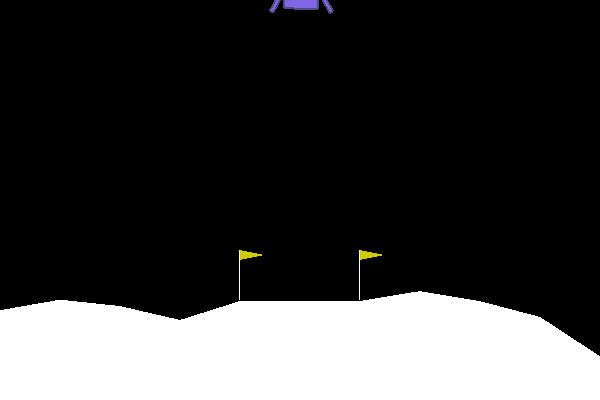

In [11]:
env.reset()
PIL.Image.fromarray(env.render(mode='rgb_array'))

In [13]:
state_size = env.observation_space.shape
num_actions = env.action_space.n

print('State Shape:', state_size)
print('Number of actions:', num_actions)

State Shape: (8,)
Number of actions: 4


## 5 - Interacting with the Gym Environment

In [14]:
# Reset the environment and get the initial state.
initial_state = env.reset()

In [15]:
# Select an action
action = 0

# Run a single time step of the environment's dynamics with the given action.
next_state, reward, done, info = env.step(action)

with np.printoptions(formatter={'float': '{:.3f}'.format}):
    print("Initial State:", initial_state)
    print("Action:", action)
    print("Next State:", next_state)
    print("Reward Received:", reward)
    print("Episode Terminated:", done)
    print("Info:", info)

Initial State: [0.008 1.410 0.778 -0.033 -0.009 -0.176 0.000 0.000]
Action: 0
Next State: [0.015 1.409 0.776 -0.058 -0.018 -0.174 0.000 0.000]
Reward Received: -0.7906398035929385
Episode Terminated: False
Info: {}


## 6 - Deep Q-Learning

### 6.1 Target Network

In [16]:
print(state_size)

(8,)


In [17]:
# Create the Q-Network
q_network = Sequential([
     Input(shape=state_size),
     Dense(64, activation="relu"),
     Dense(64, activation="relu"),
     Dense(num_actions, activation="linear")
    ])

# Create the target Q^-Network
target_q_network = Sequential([
    Input(shape=state_size),
     Dense(64, activation="relu"),
     Dense(64, activation="relu"),
     Dense(num_actions, activation="linear")
    ])

optimizer = Adam(learning_rate=ALPHA)

### 6.2 Experience Replay

In [19]:
# Store experiences as named tuples
experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])

## 7 - Deep Q-Learning Algorithm with Experience Replay

In [ ]:
#states, actions, rewards, next_states, done_vals = experience

In [20]:
def compute_loss(experiences, gamma, q_network, target_q_network):

    
    # Unpack the mini-batch of experience tuples
    states, actions, rewards, next_states, done_vals = experiences
    
    # Compute max Q^(s,a)
    max_qsa = tf.reduce_max(target_q_network(next_states), axis=-1)
        
    y_targets = rewards + (gamma * max_qsa * (1 - done_vals))
    
    # Get the q_values
    q_values = q_network(states)
    q_values = tf.gather_nd(q_values, tf.stack([tf.range(q_values.shape[0]),
                                                tf.cast(actions, tf.int32)], axis=1))
        
    # Compute the loss
    loss = MSE(y_targets, q_values) 
    
    return loss

## 8 - Update the Network Weights

In [21]:
@tf.function
def agent_learn(experiences, gamma):  
    # Calculate the loss
    with tf.GradientTape() as tape:
        loss = compute_loss(experiences, gamma, q_network, target_q_network)

    # Get the gradients of the loss with respect to the weights.
    gradients = tape.gradient(loss, q_network.trainable_variables)
    
    # Update the weights of the q_network.
    optimizer.apply_gradients(zip(gradients, q_network.trainable_variables))

    # update the weights of target q_network
    utils.update_target_network(q_network, target_q_network)

## 9 - Train the Agent

In [22]:
start = time.time()

num_episodes = 2000
max_num_timesteps = 1000

total_point_history = []

num_p_av = 100    # number of total points to use for averaging
epsilon = 1.0     # initial ε value for ε-greedy policy

# Create a memory buffer D with capacity N
memory_buffer = deque(maxlen=MEMORY_SIZE)

target_q_network.set_weights(q_network.get_weights())

for i in range(num_episodes):
    
    # Reset the environment to the initial state and get the initial state
    state = env.reset()
    total_points = 0
    
    for t in range(max_num_timesteps):
        
        # From the current state S choose an action A using an ε-greedy policy
        state_qn = np.expand_dims(state, axis=0)  # state needs to be the right shape for the q_network
        q_values = q_network(state_qn)
        action = utils.get_action(q_values, epsilon)
        
        # Take action A and receive reward R and the next state S'
        next_state, reward, done, _ = env.step(action)
        
        memory_buffer.append(experience(state, action, reward, next_state, done))
        
        # Only update the network every NUM_STEPS_FOR_UPDATE time steps.
        update = utils.check_update_conditions(t, NUM_STEPS_FOR_UPDATE, memory_buffer)
        
        if update:
            # Sample random mini-batch of experience tuples (S,A,R,S') from D
            experiences = utils.get_experiences(memory_buffer)
            
            # and update the network weights.
            agent_learn(experiences, GAMMA)
        
        state = next_state.copy()
        total_points += reward
        
        if done:
            break
            
    total_point_history.append(total_points)
    av_latest_points = np.mean(total_point_history[-num_p_av:])
    
    # Update the ε value
    epsilon = utils.get_new_eps(epsilon)

    print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}", end="")

    if (i+1) % num_p_av == 0:
        print(f"\rEpisode {i+1} | Total point average of the last {num_p_av} episodes: {av_latest_points:.2f}")

    # average of 200 points in the last 100 episodes.
    if av_latest_points >= 200.0:
        print(f"\n\nEnvironment solved in {i+1} episodes!")
        q_network.save('lunar_lander_model.h5')
        break
        
tot_time = time.time() - start

print(f"\nTotal Runtime: {tot_time:.2f} s ({(tot_time/60):.2f} min)")

Episode 100 | Total point average of the last 100 episodes: -163.38
Episode 200 | Total point average of the last 100 episodes: -92.73
Episode 300 | Total point average of the last 100 episodes: -71.58
Episode 400 | Total point average of the last 100 episodes: -28.29
Episode 500 | Total point average of the last 100 episodes: 15.42
Episode 600 | Total point average of the last 100 episodes: 115.28
Episode 671 | Total point average of the last 100 episodes: 200.14

Environment solved in 671 episodes!

Total Runtime: 1344.48 s (22.41 min)


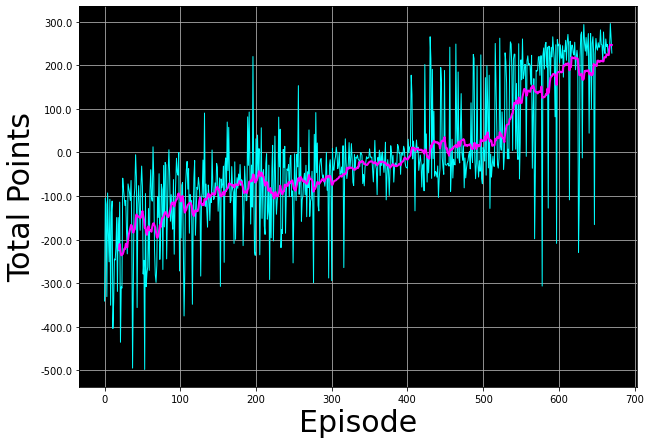

In [23]:
# Plot the point history
utils.plot_history(total_point_history)

## 10 - See the Trained Agent In Action

In [24]:
# Suppress warnings from imageio
import logging
logging.getLogger().setLevel(logging.ERROR)

In [27]:
filename = "/content/videos/lunar_lander.mp4"

utils.create_video(filename, env, q_network)
utils.embed_mp4(filename)